- **Jamboree has helped thousands of students like you make it to top colleges abroad. Be it GMAT, GRE or SAT, their unique problem-solving methods ensure maximum scores with minimum effort.**
- **They recently launched a feature where students/learners can come to their website and check their probability of getting into the IVY league college. This feature estimates the chances of graduate admission from an Indian perspective**

### Problem Statement: 
- Analyse the predictor variables to draw insights about the importance of various factors in prediction of chances of graduate admission and how they are related to each other

In [ ]:
import numpy as np, pandas as pd, seaborn as sns

import matplotlib.pyplot as plt

data = pd.read_csv("C:/Users/asus/Downloads/Jamboree_Admission.csv")

In [548]:
data

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


In [581]:
data.shape

(500, 9)

In [582]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [583]:
data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [842]:
# Dropping unnecessary column "Serial No."

data = data.drop(columns = "Serial No.")
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [795]:
# categorizing columns
for i in data.columns:
    print(i, '--->', '\n', data[i].nunique(), '\n')

GRE Score ---> 
 49 

TOEFL Score ---> 
 29 

University Rating ---> 
 5 

SOP ---> 
 9 

LOR  ---> 
 9 

CGPA ---> 
 184 

Research ---> 
 2 

Chance of Admit  ---> 
 61 



In [843]:
data.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

### Some anomalies in the column names, there is extra space in "LOR " and "Chance of Admit "

In [844]:
# fixing the column names
data.rename(columns = {'LOR ': 'LOR', 'Chance of Admit ': 'Chance of Admit'}, inplace = True)

In [792]:
columns = ['University Rating', 'SOP', 'LOR']
unique_values = data[columns].apply(lambda x: x.unique())
unique_values

University Rating                                  [4, 3, 2, 5, 1]
SOP                  [4.5, 4.0, 3.0, 3.5, 2.0, 5.0, 1.5, 1.0, 2.5]
LOR                  [4.5, 3.5, 2.5, 3.0, 4.0, 1.5, 2.0, 5.0, 1.0]
dtype: object

### These 3 columns look categorical

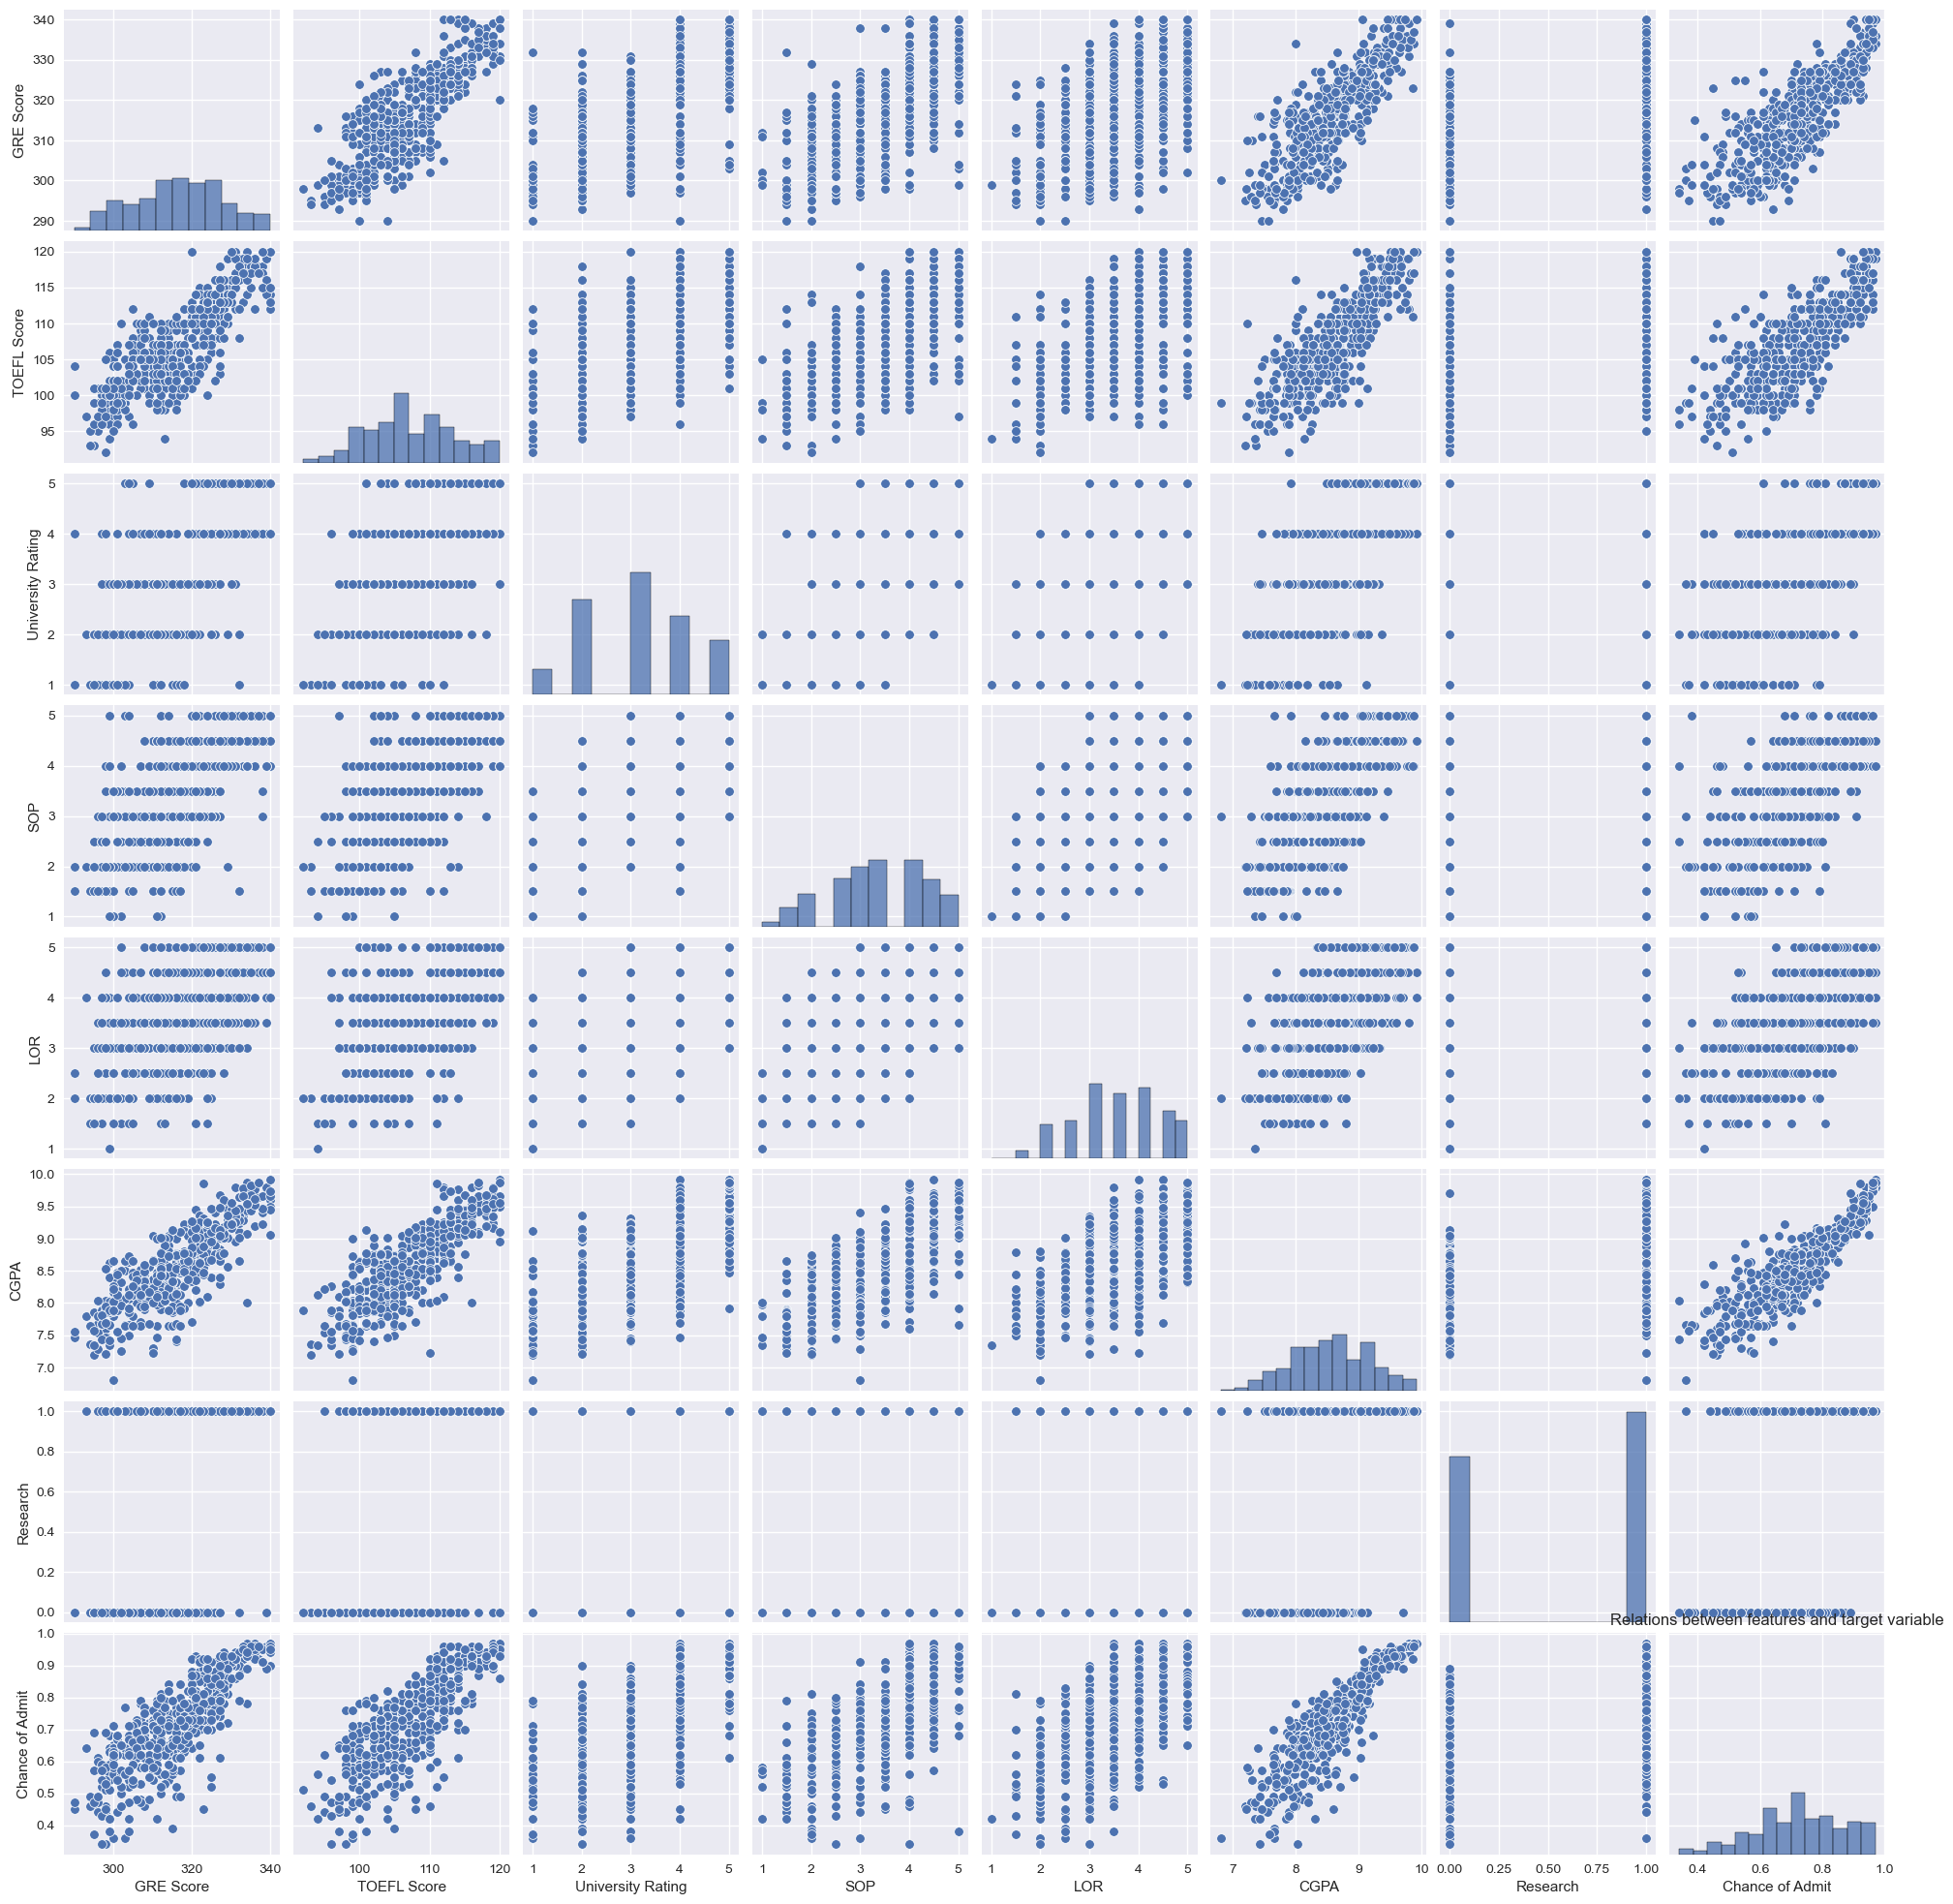

In [298]:
sns.pairplot(data)
plt.title("Relations between features and target variable")
plt.show()

- **Exam scores (GRE, TOEFL and CGPA) have a high positive correlation with chance of admit**
- **While university rating, SOP and LOR also have an impact on chances of admit, research is the only variable which doesn't have much of an impact**
- **We can see from the scatterplot that the values of university Rating, SOP, LOR and research are not continuous. We can convert these columns to categorical variables**

In [299]:
data.corr()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
GRE Score,1.000000,0.827200,0.635376,0.613498,0.524679,0.825878,0.563398,0.810351
TOEFL Score,0.827200,1.000000,0.649799,0.644410,0.541563,0.810574,0.467012,0.792228
University Rating,0.635376,0.649799,1.000000,0.728024,0.608651,0.705254,0.427047,0.690132
SOP,0.613498,0.644410,0.728024,1.000000,0.663707,0.712154,0.408116,0.684137
LOR,0.524679,0.541563,0.608651,0.663707,1.000000,0.637469,0.372526,0.645365
CGPA,0.825878,0.810574,0.705254,0.712154,0.637469,1.000000,0.501311,0.882413
Research,0.563398,0.467012,0.427047,0.408116,0.372526,0.501311,1.000000,0.545871
Chance of Admit,0.810351,0.792228,0.690132,0.684137,0.645365,0.882413,0.545871,1.000000


<AxesSubplot:>

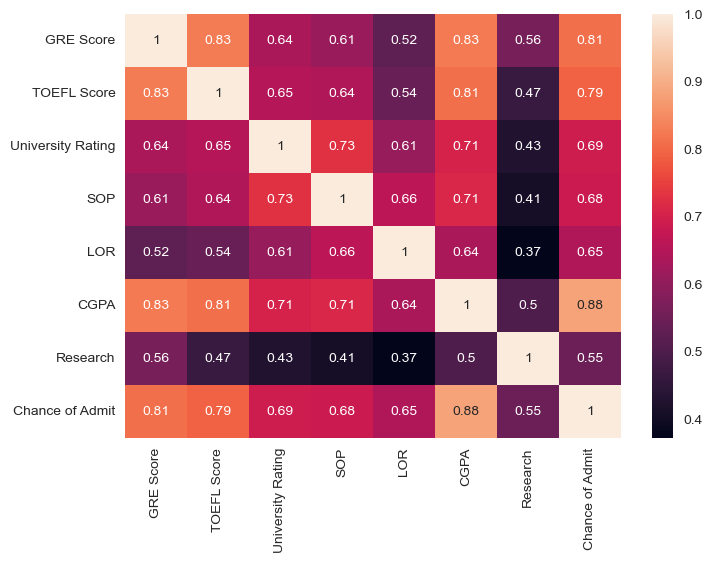

In [300]:
sns.heatmap(data.corr(), annot=True)

- **Confirming the inferences from pairplot, the correlation matrix also shows that exam scores (CGPA/GRE/TOEFL) have a strong positive correlation with chance of admit**
- **Infact, they are also highly correlated amongst themselves**

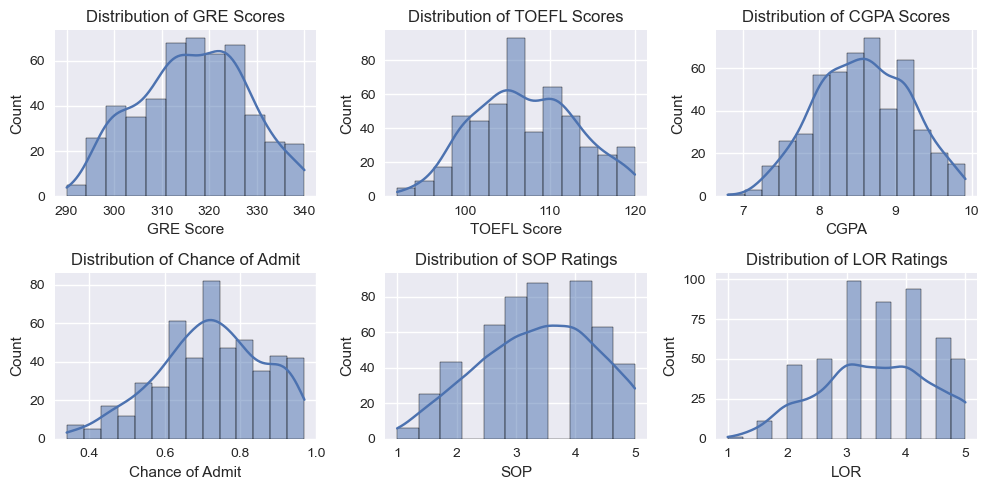

In [912]:
fig, axes = plt.subplots(2,3, figsize = (10, 5))
sns.histplot(data['GRE Score'],kde=True, ax=axes[0, 0])
axes[0,0].set_title("Distribution of GRE Scores")

sns.histplot(data['TOEFL Score'],kde=True, ax=axes[0, 1])
axes[0,1].set_title("Distribution of TOEFL Scores")

sns.histplot(data['CGPA'],kde=True, ax=axes[0, 2])
axes[0,2].set_title("Distribution of CGPA Scores")

sns.histplot(data['Chance of Admit'],kde=True, ax=axes[1, 0])
axes[1,0].set_title("Distribution of Chance of Admit")

sns.histplot(data['SOP'],kde=True, ax=axes[1, 1])
axes[1,1].set_title("Distribution of SOP Ratings")

sns.histplot(data['LOR'],kde=True, ax=axes[1, 2])
axes[1,2].set_title("Distribution of LOR Ratings")
plt.tight_layout()
plt.show()

#### We can see the range of all the numerical attributes:

- GRE scores are between 290 and 340, with maximum students scoring in the range 310-330
- TOEFL scores are between 90 and 120, with maximum students scoring around 105
- CGPA ranges between 7 and 10, with maximum students scoring around 8.5
- Chance of Admit is a probability percentage between 0 and 1, with maximum students scoring around 70%-75%

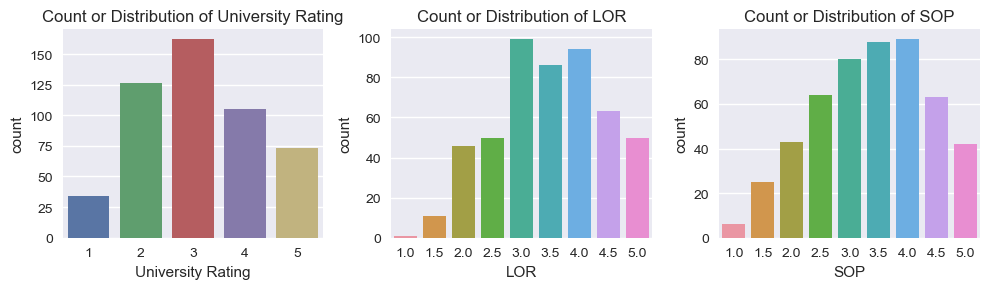

In [83]:
cat_vars = ['University Rating', 'LOR', 'SOP']
fig, axes = plt.subplots(1, len(cat_vars), figsize=(10, 3))

for i, var in enumerate(cat_vars):
    sns.countplot(x=data[var], ax=axes[i])
    axes[i].set_title(f'Count or Distribution of {var}')
plt.tight_layout()
plt.show()

### Students are coming from various merit background. However, It can be observed that the most frequent value of categorical features is as following:

- University Rating: 3
- SOP: 3.5 & 4
- LOR: 3

## Need to understand the relation between different factors for admission

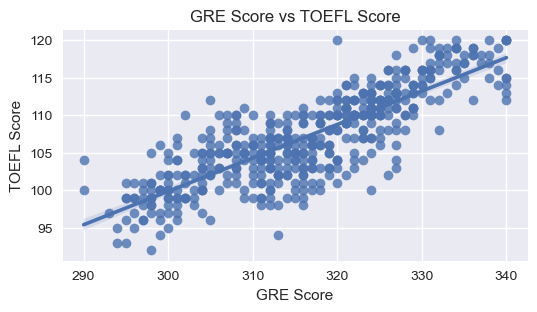

In [90]:
plt.figure(figsize=(6,3))
sns.regplot(x='GRE Score', y='TOEFL Score', data=data)
plt.title("GRE Score vs TOEFL Score")
plt.show()

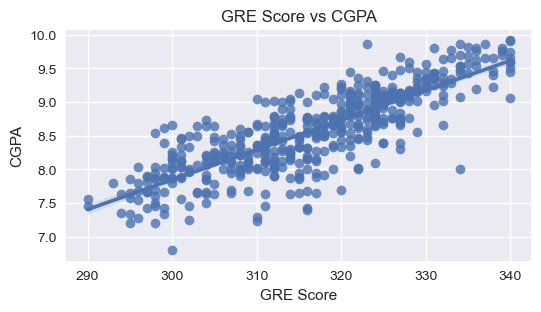

In [91]:
plt.figure(figsize=(6,3))
sns.regplot(x='GRE Score', y='CGPA', data=data)
plt.title("GRE Score vs CGPA")
plt.show()

#### People with higher CGPA have higher GRE score, with some exception

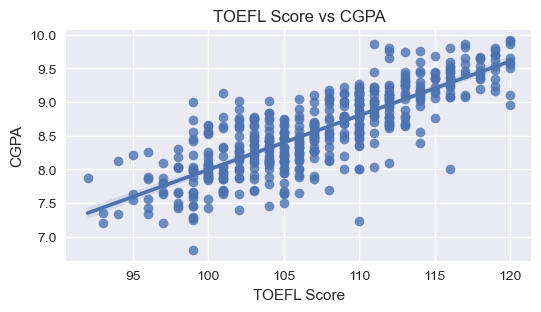

In [94]:
plt.figure(figsize=(6,3))
sns.regplot(x='TOEFL Score', y='CGPA', data=data)
plt.title("TOEFL Score vs CGPA")
plt.show()

#### Same is the case with TOEFL and CGPA

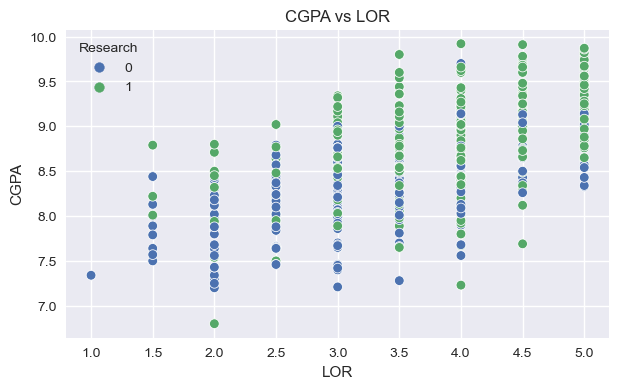

In [108]:
plt.figure(figsize = (7,4))
sns.scatterplot(x='LOR', y= 'CGPA', data = data, hue='Research')
plt.title("CGPA vs LOR")
plt.show()

- **IT is evident that LORs are not that related with CGPA so it is clear that a person's LOR is not dependent on academic excellence.**
- **Having research experience is usually related with a good LOR, the reason may be the personal interaction with the supervisor that results in better LOR**

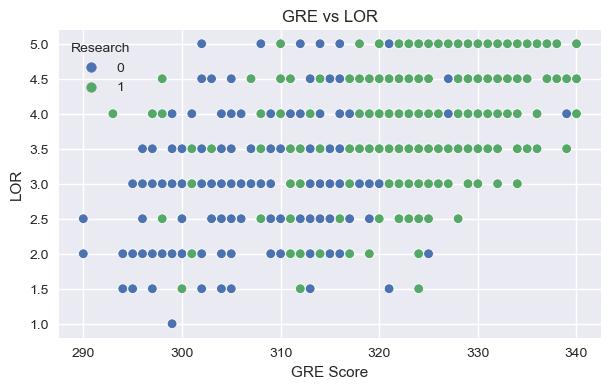

In [110]:
plt.figure(figsize = (7,4))
sns.scatterplot(x='GRE Score', y= 'LOR', data = data, hue='Research')
plt.title("GRE vs LOR")
plt.show()

- **GRE and LOR are also not so related, people with different LOR have different GRE Score**

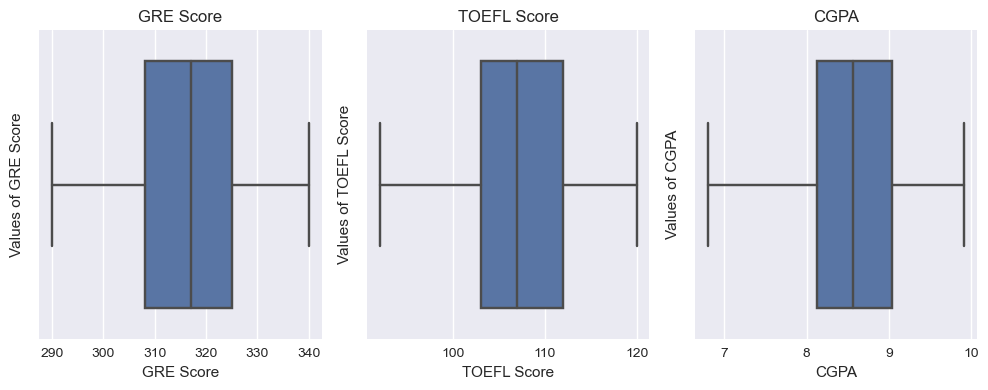

In [918]:
numeric_cols = ['GRE Score', 'TOEFL Score', 'CGPA']

plt.figure(figsize=(10,4))
i=1

for col in data[numeric_cols]:    
    ax = plt.subplot(1,3,i)
    sns.boxplot(data[col])
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel(f'Values of {col}')
    i+=1

plt.tight_layout()
plt.show()

#### It can be observed that there are no outliers in the numeric columns (all the observations are within the whiskers which represent the mimimum and maximum of the range of values)

## Base Model

In [845]:
from sklearn.model_selection import train_test_split

X = data.drop(['Chance of Admit'], axis = 1)
y = data['Chance of Admit']

In [846]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, shuffle = True)

In [847]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((400, 7), (400,), (100, 7), (100,))

### Label Encoding for categorical feaures

In [848]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
X_train['University Rating'] = label_encoder.fit_transform(X_train['University Rating'])
X_train['SOP'] = label_encoder.fit_transform(X_train['SOP'])
X_train['LOR'] = label_encoder.fit_transform(X_train['LOR'])

X_test['University Rating'] = label_encoder.transform(X_test['University Rating'])
X_test['SOP'] = label_encoder.transform(X_test['SOP'])
X_test['LOR'] = label_encoder.transform(X_test['LOR'])

### Scaling the data

In [849]:
from sklearn.preprocessing import StandardScaler

X_train_cols = X_train.columns

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [850]:
X_train_scaled

array([[ 0.83099516,  1.11752057, -0.0785764 , ..., -0.50570383,
         0.87219852,  0.8819171 ],
       [ 1.44298528,  0.95437888,  1.66756588, ...,  0.56456883,
         1.15479965,  0.8819171 ],
       [-0.21813076,  0.30181212,  0.79449474, ...,  0.56456883,
         0.30699626,  0.8819171 ],
       ...,
       [ 1.79269392,  1.60694563,  1.66756588, ...,  1.63484149,
         2.13559181,  0.8819171 ],
       [-1.61696532, -1.00332139,  0.79449474, ...,  1.09970516,
        -1.4883521 ,  0.8819171 ],
       [ 0.743568  ,  0.46495381,  0.79449474, ...,  0.56456883,
         0.1407603 ,  0.8819171 ]])

In [851]:
X_train_scaled = pd.DataFrame(X_train_scaled,columns=X_train_cols)

In [852]:
X_train_scaled

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,0.830995,1.117521,-0.078576,-0.357378,-0.505704,0.872199,0.881917
1,1.442985,0.954379,1.667566,0.660069,0.564569,1.154800,0.881917
2,-0.218131,0.301812,0.794495,0.151345,0.564569,0.306996,0.881917
3,0.219005,0.138670,-0.951648,-0.866102,-0.505704,0.290373,-1.133893
4,0.306432,-0.677038,-0.078576,-0.357378,-0.505704,-1.471729,-1.133893
...,...,...,...,...,...,...,...
395,-1.442111,-0.350755,-1.824719,-2.392272,-1.575976,-1.305493,-1.133893
396,-0.567839,-0.187613,0.794495,1.168792,1.099705,0.755833,0.881917
397,1.792694,1.606946,1.667566,1.677516,1.634841,2.135592,0.881917
398,-1.616965,-1.003321,0.794495,-0.866102,1.099705,-1.488352,0.881917


In [853]:
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

LinearRegression()

In [854]:
lr_model.coef_

array([ 0.0248191 ,  0.0121061 ,  0.00751037, -0.00091766,  0.01706318,
        0.07233412,  0.01371678])

In [855]:
for feature, weight in zip(X_train.columns, lr_model.coef_):
    print(f"Weight of {feature}: {np.round(weight,2)}")

Weight of GRE Score: 0.02
Weight of TOEFL Score: 0.01
Weight of University Rating: 0.01
Weight of SOP: -0.0
Weight of LOR: 0.02
Weight of CGPA: 0.07
Weight of Research: 0.01


In [856]:
lr_model.intercept_

0.7207250000000001

In [857]:
y_hat = lr_model.predict(X_test)
y_hat.shape, y_test.shape

((100,), (100,))

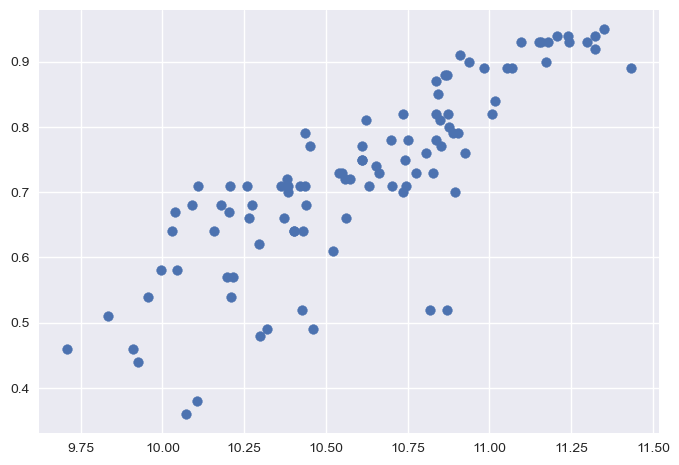

In [858]:
fig = plt.figure()
plt.scatter(y_hat,y_test)

plt.show()

In [859]:
train_score = lr_model.score(X_train_scaled, y_train)
test_score = lr_model.score(X_test_scaled, y_test)

print("Training R-squared score:", train_score)
print("Testing R-squared score:", test_score)

Training R-squared score: 0.8321154501111574
Testing R-squared score: 0.7735320304841454


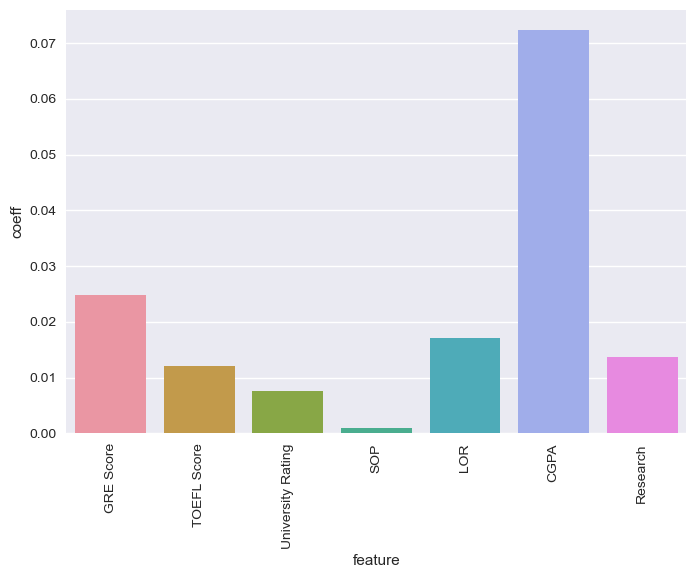

In [860]:
import seaborn as sns

imp = pd.DataFrame(list(zip(X_test.columns,np.abs(lr_model.coef_))),
                   columns=['feature', 'coeff'])
sns.barplot(x='feature', y='coeff', data=imp)
plt.xticks(rotation=90)
plt.show()

### Statsmodel Implementation

In [861]:
import statsmodels.api as sm
sm_X_train = sm.add_constant(X_train_scaled)
model = sm.OLS(y_train.values,sm_X_train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     277.6
Date:                Sun, 28 Apr 2024   Prob (F-statistic):          1.33e-147
Time:                        11:43:07   Log-Likelihood:                 571.69
No. Observations:                 400   AIC:                            -1127.
Df Residuals:                     392   BIC:                            -1095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.7207      0.00

## Dropping the 'SOP' column because it has the coeff = 0 and p_value very hiigh

In [919]:
# Remove the "SOP" feature from the entire dataset
X_updated = X.drop(columns=['SOP'])

# Split the updated data into features (X) and target variable (y)
X_train_updated, X_test_updated, y_train, y_test = train_test_split(X_updated, y, test_size=0.2, shuffle=True, random_state=42)

X_train_updated_cols = X_train_updated.columns

scaler = StandardScaler()
X_train_updated_scaled = scaler.fit_transform(X_train_updated)
X_test_updated_scaled = scaler.transform(X_test_updated)

# Initialize and train the model
lr_model_updated = LinearRegression()
lr_model_updated.fit(X_train_updated_scaled, y_train)

# Evaluate the model
train_score_updated = lr_model_updated.score(X_train_updated_scaled, y_train)
test_score_updated = lr_model_updated.score(X_test_updated_scaled, y_test)

print("Updated Training R-squared score:", train_score_updated)
print("Updated Testing R-squared score:", test_score_updated)
 

Updated Training R-squared score: 0.8210089089613841
Updated Testing R-squared score: 0.818803410253108


## Mean of Residuals

In [923]:
y_pred_updated = lr_model_updated.predict(X_test_updated_scaled)


residuals = y_test - y_pred_updated

mean_residuals = residuals.mean()

print("Mean of Residuals:", mean_residuals)



Mean of Residuals: -0.0054417005685433685


### Getting the adjusted R2, MSE and RMSE to see the model's performance

In [924]:
from sklearn.metrics import mean_squared_error

d = X_test_updated.shape[1]
n = len(y_test)

# R-squared score for the test set
r2_test = lr_model_updated.score(X_test_updated_scaled, y_test)

# Adjusted R-squared score for the test set
adjusted_r2_test = 1 - (1 - r2_test) * (n - 1) / (n - d - 1)

# Mean Squared Error (MSE) for the test set
mse_test = mean_squared_error(y_test, y_pred_updated)

# Calculate Root Mean Squared Error (RMSE) for the test set
rmse_test = np.sqrt(mse_test)

print("Test R-squared score:", r2_test)
print("Test Adjusted R-squared score:", adjusted_r2_test)
print("Test MSE:", mse_test)
print("Test RMSE:", rmse_test)

Test R-squared score: 0.818803410253108
Test Adjusted R-squared score: 0.8071133076887924
Test MSE: 0.003705470260323943
Test RMSE: 0.06087257395842518


#### Since there is no big difference in the loss scores of training and test data, we can conclude that there is no overfitting of the model

- Mean Squared Error of 0.003 shows that on an average, the absolute difference between the actual and predicted values of chance of admit is 0.4% which is a sign of very good model
- Root Mean Square Error of 0.06 means that on an average, the root of squared difference between the actual and predicted values is 6%
- R2 Score of 0.82 means that our model captures 82% variance in the data
- Adjusted R2 is an extension of R2 which shows how the number of features used changes the accuracy of the prediction

## Assumptions

### 1) Multi-colinearity

In [931]:
# VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()  # to store the values of vif
X_vif = pd.DataFrame(X_train_updated_scaled,columns=X_train_updated_cols)

vif['Features'] = X_train_updated_cols
vif['VIF_Score'] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]

vif['VIF_Score'] = round(vif['VIF_Score'], 2)

vif

,Features,VIF_Score
0,GRE Score,4.49
1,TOEFL Score,3.62
2,University Rating,2.28
3,LOR,1.80
4,CGPA,4.48
5,Research,1.52


## VIF for all the features look fine

## Assumption of Homoscedastisity

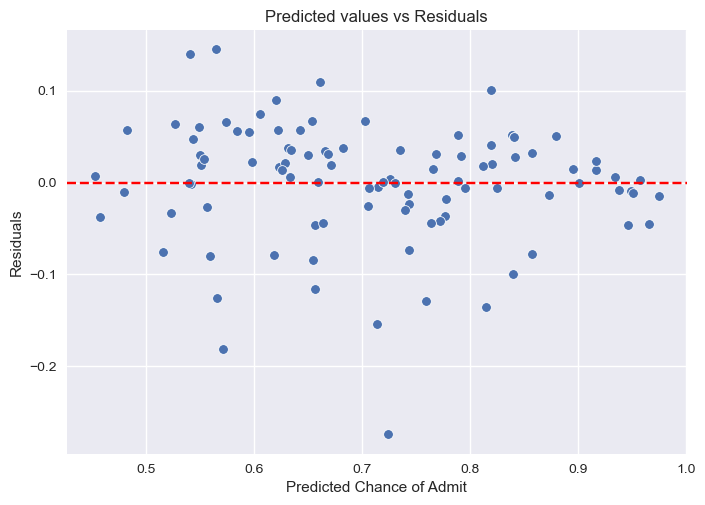

In [893]:
sns.scatterplot(x = y_pred_updated, y = residuals)
plt.xlabel("Predicted Chance of Admit")
plt.ylabel("Residuals")
plt.title("Predicted values vs Residuals")
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

In [927]:
# Performing the Goldfeld-Quandt test to check for Homoscedasticity -
from statsmodels.compat import lzip
import statsmodels.stats.api as sms

name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(residuals, X_test_updated_scaled)
lzip(name, test)

[('F statistic', 0.49430116099163757), ('p-value', 0.9892882699780918)]

### The graph is showing and the p_value from goldfeldquand test is proving that the data is Homoscedastic.
- H0: Data is Homoscedastic
- Ha: Data is Heteroscadestic
- **We fail to reject**

Text(0.5, 1.0, 'Histogram of residuals')

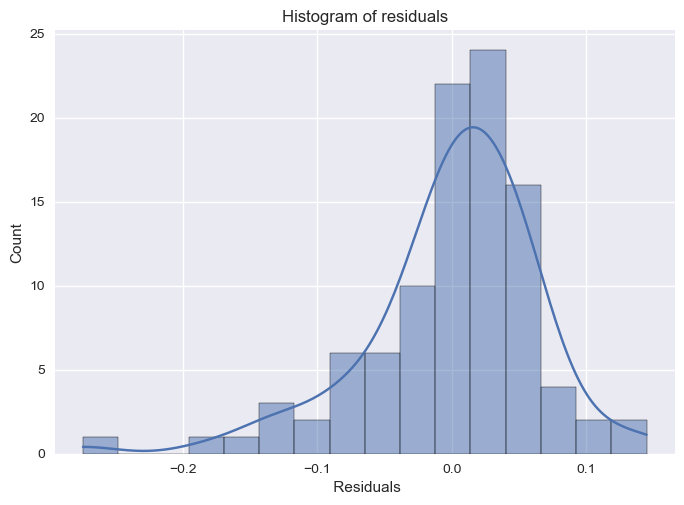

In [898]:
import seaborn as sns
sns.histplot(residuals, kde=True)
plt.xlabel(" Residuals")
plt.title("Histogram of residuals")

In [899]:
from scipy import stats
res = stats.shapiro(residuals)
res.statistic

0.9265638589859009

## The histogram shows that there is a negative skew in the distribution of residuals but it is close to a normal distribution. It os aldo confirmed through Shapiro Stat of 0.92 which is very close to 1

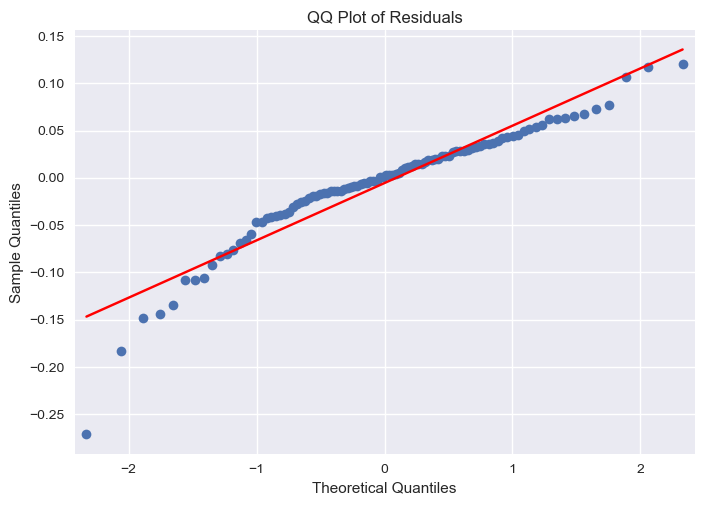

In [933]:
from statsmodels.graphics.gofplots import qqplot
qqplot(residuals, line='s')
plt.title('QQ Plot of Residuals')
plt.show()

## Althogh Linear Regression model fits well, just trying the regularization of Ridge and Lasso and checking the difference. Same is represented with graphs as well below

In [928]:
from sklearn.linear_model import Ridge

# Initialize and train the Lasso model
Ridge_model = Ridge()  # You can adjust the alpha parameter as needed
Ridge_model.fit(X_train_updated_scaled, y_train)

# Predict on the test set
y_pred_Ridge = Ridge_model.predict(X_test_updated_scaled)

# R-squared score for the test set
r2_Ridge = Ridge_model.score(X_test_updated_scaled, y_test)

# Adjusted R-squared score for the test set
adjusted_r2_Ridge = 1 - (1 - r2_Ridge) * (n - 1) / (n - d - 1)

# Mean Squared Error (MSE) for the test set
mse_Ridge = mean_squared_error(y_test, y_pred_Ridge)

# Calculate Root Mean Squared Error (RMSE) for the test set
rmse_Ridge = np.sqrt(mse_Ridge)

print("Ridge Test R-squared score:", r2_Ridge)
print("Ridge Test Adjusted R-squared score:", adjusted_r2_Ridge)
print("Ridge Test MSE:", mse_Ridge)
print("Ridge Test RMSE:", rmse_Ridge)


Ridge Test R-squared score: 0.8187479336716472
Ridge Test Adjusted R-squared score: 0.8070542519730438
Ridge Test MSE: 0.0037066047564148163
Ridge Test RMSE: 0.06088189185968859


In [929]:
from sklearn.linear_model import Lasso

# Initialize and train the Lasso model
lasso_model = Lasso()  # You can adjust the alpha parameter as needed
lasso_model.fit(X_train_updated_scaled, y_train)

# Predict on the test set
y_pred_lasso = lasso_model.predict(X_test_updated_scaled)

# R-squared score for the test set
r2_lasso = lasso_model.score(X_test_updated_scaled, y_test)

# Adjusted R-squared score for the test set
adjusted_r2_lasso = 1 - (1 - r2_lasso) * (n - 1) / (n - d - 1)

# Mean Squared Error (MSE) for the test set
mse_lasso = mean_squared_error(y_test, y_pred_lasso)

# Calculate Root Mean Squared Error (RMSE) for the test set
rmse_lasso = np.sqrt(mse_lasso)

print("Lasso Test R-squared score:", r2_lasso)
print("Lasso Test Adjusted R-squared score:", adjusted_r2_lasso)
print("Lasso Test MSE:", mse_lasso)
print("Lasso Test RMSE:", rmse_lasso)


Lasso Test R-squared score: -0.00724844132029312
Lasso Test Adjusted R-squared score: -0.07223221172805405
Lasso Test MSE: 0.020598230624999995
Lasso Test RMSE: 0.1435208369018241


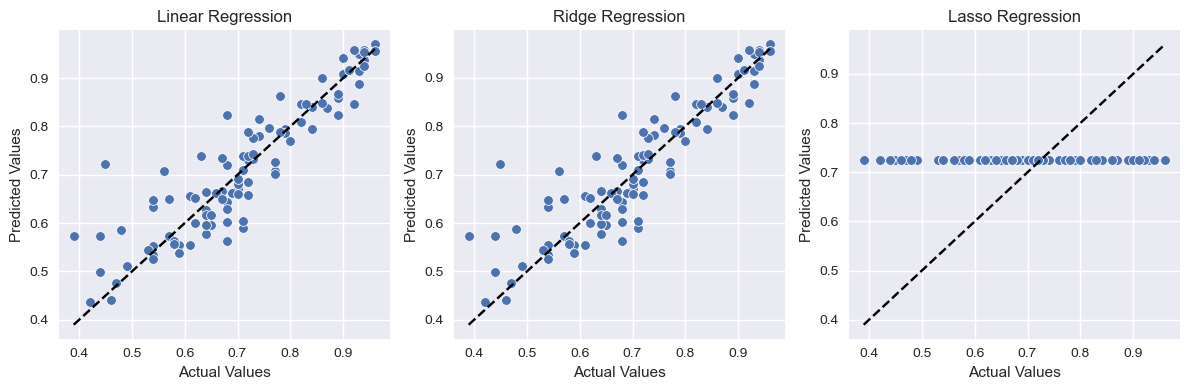

In [930]:
# Combine the actual and predicted values for each model
actual_values = y_test.values.reshape((-1,))
predicted_values = [y_pred_updated, y_pred_Ridge, y_pred_lasso]
model_names = ['Linear Regression', 'Ridge Regression', 'Lasso Regression']

# Plotting the actual vs. predicted values for each model
plt.figure(figsize=(12, 4))
for i, preds in enumerate(predicted_values, start=1):
    ax = plt.subplot(1, 3, i)
    sns.scatterplot(x=actual_values, y=preds)
    plt.plot([min(actual_values), max(actual_values)], [min(actual_values), max(actual_values)], 'k--')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title(model_names[i - 1])

plt.tight_layout()
plt.show()


- **We can observe that both Linear Regression and Ridge Regression have similar accuracy while Lasso regression has oversimplified the model.**


## Insights:

- The distribution of target variable (chances of admit) is left-skewed
- Exam scores (CGPA/GRE/TOEFL) have a strong positive correlation with chance of admit. These variables are also highly correlated amongst themselves.
- The categorical variables such as university ranking, research, quality of SOP and LOR also show an upward trend for chances of admit.
- From the model coefficients (weights), we can conclude that CGPA is the most significant predictor variable while SOP/University Rating are the least significant
- Both Linear Regression and Ridge Regression models, which are our best models, have captured upto 80% of the variance in the target variable (chance of admit). Due to high colinearity among the predictor variables, it is difficult to achieve better results.
- Other than multicolinearity, the predictor variables have met the conditions required for Linear Regression - mean of residuals is close to 0, linearity of variables, normality of residuals and homoscedasticity is established.

## Recommendations:

- **Since all the exam scores are highly correlated, it is recommended to add more independent features for better prediction.**
- **Examples of other independent variables could be work experience, internships, mock interview performance, extracurricular activities or diversity variables**